In [1]:
import math, random

import sys
import gym
import numpy as np


In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [3]:
def plot(frame_idx, rewards):
    clear_output(True)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title('frame %s. reward: %s' % (frame_idx, np.mean(rewards[-10:])))
    plt.plot(rewards)
    plt.show()

In [4]:
from common.wrappers import make_atari, wrap_deepmind, wrap_pytorch

In [5]:
# You may choose the environment from these environment setting below:
# Pong: PongNoFrameskip-v4
# Krull: KrullNoFrameskip-v4
# Tutankham: TutankhamNoFrameskip-v4
# Atlantis: AtlantisNoFrameskip-v4
# Freeway: FreewayNoFrameskip-v4
# Beam Rider: BeamRiderNoFrameskip-v4

In [6]:
from agent import make_agent

In [7]:
def atari_test(env_id):
    # create model
    current_model, num_frames = make_agent(env_id)
    print('Start test {} {} frames'.format(env_id, num_frames))
    
    env = make_atari(env_id)
    env = wrap_deepmind(env, episode_life=False, clip_rewards=False)
    env = wrap_pytorch(env)

    all_rewards = []
    episode_reward = 0

    state = env.reset()
    for frame_idx in range(1, num_frames + 1):
        action = current_model.act(state)

        next_state, reward, done, _ = env.step(action)

        state = next_state
        episode_reward += reward

        if done:
            print('frame_idx : {}/{}, total_reward : {}'.format(frame_idx, num_frames, episode_reward))
            state = env.reset()
            all_rewards.append(episode_reward)
            episode_reward = 0

        if frame_idx % 10000 == 0:
            plot(frame_idx, all_rewards)
    
    plot(frame_idx, all_rewards)
    env.close()
    
    # free agent memory
    del current_model

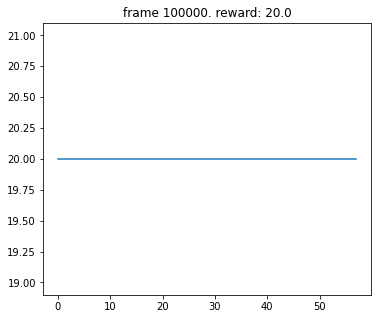

In [8]:
atari_test('PongNoFrameskip-v4')

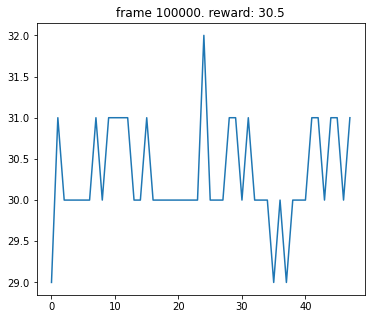

In [9]:
atari_test('FreewayNoFrameskip-v4')

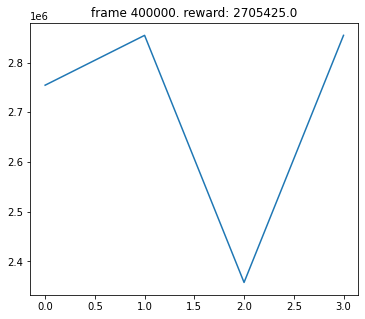

In [10]:
atari_test('AtlantisNoFrameskip-v4')

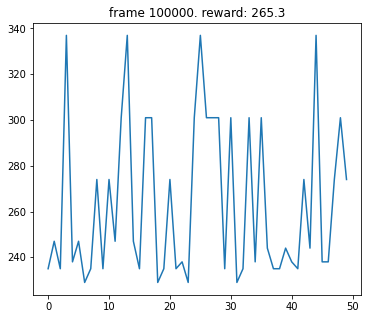

In [11]:
atari_test('TutankhamNoFrameskip-v4')

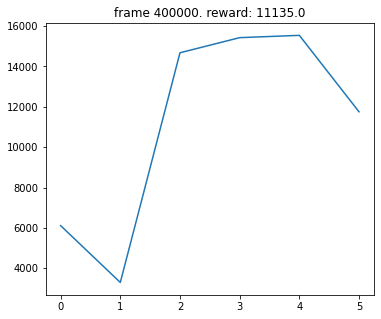

In [12]:
atari_test('KrullNoFrameskip-v4')